In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('/content/heart.csv')

In [ ]:
features = df.drop(columns=['target'])

In [ ]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
model = IsolationForest(contamination=0.1, random_state=42)  # Adjust contamination based on your expectation of anomalies
model.fit(features_scaled)

IsolationForest(contamination=0.1, random_state=42)

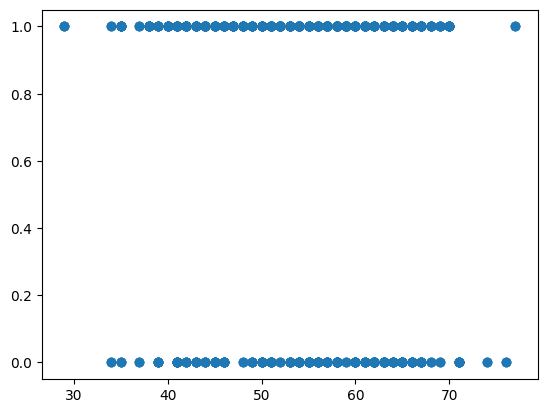

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.iloc[:,0],data.iloc[:,1])

In [ ]:
df['anomaly'] = model.predict(features_scaled)

In [ ]:
df['anomaly'] = df['anomaly'].map({1: 0, -1: 1})

In [ ]:
anomalies = df[df['anomaly'] == 1]
normal = df[df['anomaly'] == 0]

In [ ]:
print(f"Total anomalies detected: {len(anomalies)}")
print(f"Total normal cases: {len(normal)}")

Total anomalies detected: 101
Total normal cases: 924


In [ ]:
anomalies_by_gender = anomalies.groupby('sex').size()
print(anomalies_by_gender)

sex
0    43
1    58
dtype: int64


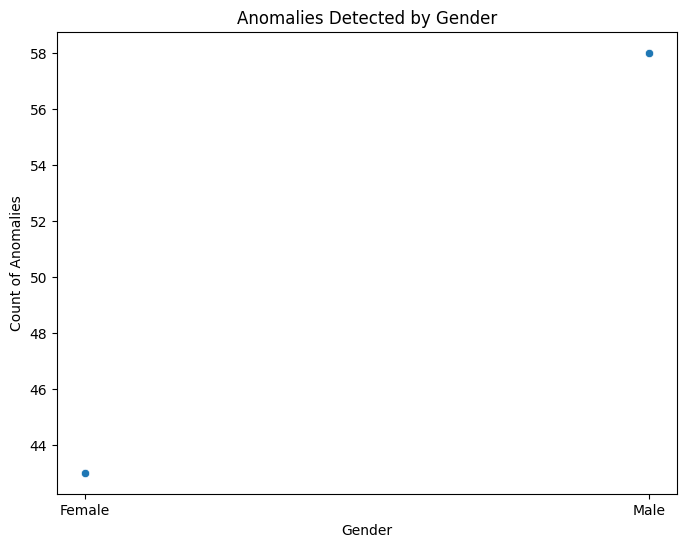

In [ ]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=anomalies_by_gender.index, y=anomalies_by_gender.values)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.xlabel('Gender')
plt.ylabel('Count of Anomalies')
plt.title('Anomalies Detected by Gender')
plt.show()


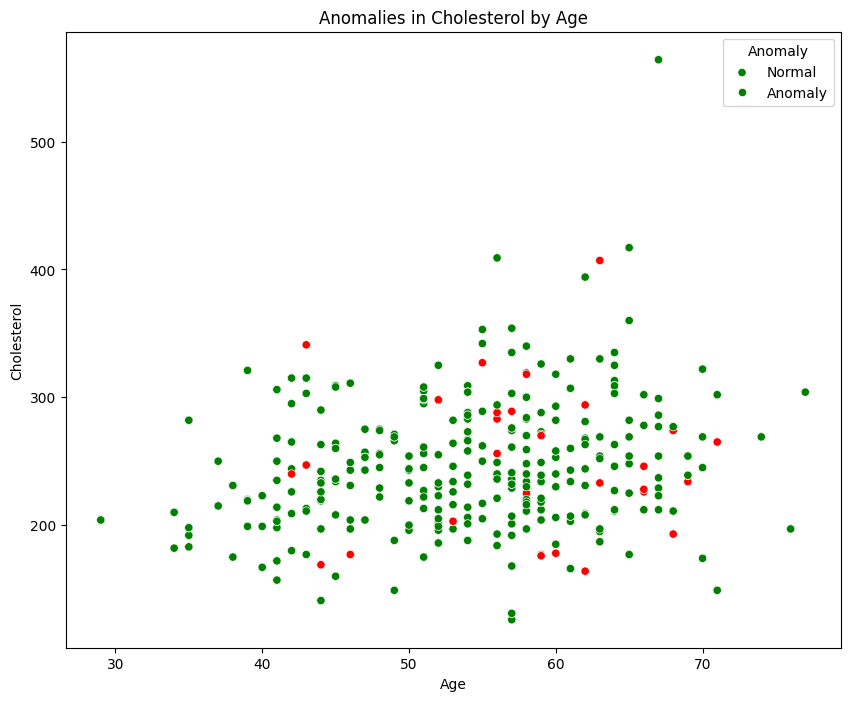

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='chol', hue='anomaly', data=df, palette=['green', 'red'])
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('Anomalies in Cholesterol by Age')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()

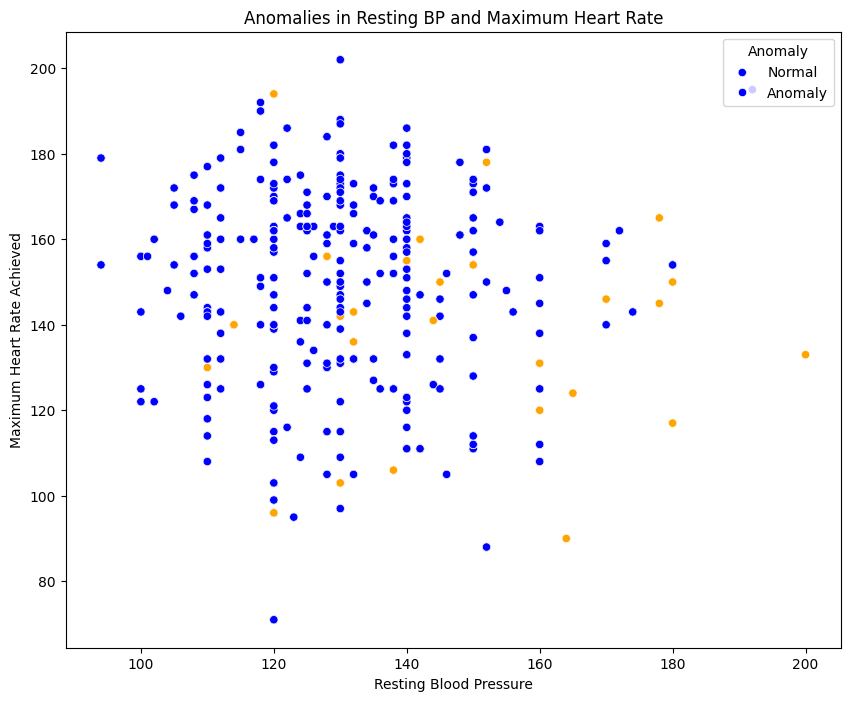

In [ ]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='trestbps', y='thalach', hue='anomaly', data=df, palette=['blue', 'orange'])
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Maximum Heart Rate Achieved')
plt.title('Anomalies in Resting BP and Maximum Heart Rate')
plt.legend(title='Anomaly', loc='upper right', labels=['Normal', 'Anomaly'])
plt.show()
